In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
data = pd.read_csv('./spam.csv',encoding='latin1')

In [5]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [0]:
data['v1'] = data['v1'].replace(['ham','spam'], [0,1])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [14]:
data['v2'].nunique(), data['v1'].nunique()

(5169, 2)

In [0]:
data.drop_duplicates(subset=['v2'], inplace=True)

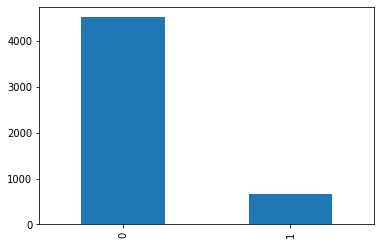

In [15]:
data['v1'].value_counts().plot(kind='bar')

In [18]:
data.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [0]:
X_data = data['v2']
y_data = data['v1']

In [42]:
tkz = Tokenizer()
tkz.fit_on_texts(X_data)
sequences = tkz.texts_to_sequences(X_data)
sequences

[[47,
  433,
  780,
  705,
  662,
  64,
  8,
  1202,
  94,
  121,
  434,
  1203,
  142,
  2712,
  1204,
  68,
  57,
  137],
 [49, 306, 1364, 435, 6, 1767],
 [53,
  537,
  8,
  20,
  4,
  1016,
  934,
  2,
  220,
  2713,
  1365,
  706,
  2714,
  2715,
  267,
  2716,
  70,
  2713,
  2,
  2717,
  2,
  359,
  537,
  604,
  1205,
  82,
  436,
  185,
  707,
  437],
 [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152],
 [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438],
 [738,
  113,
  68,
  1534,
  141,
  108,
  168,
  2104,
  22,
  7,
  38,
  348,
  83,
  828,
  55,
  110,
  391,
  3,
  41,
  12,
  14,
  80,
  1769,
  49,
  360,
  1205,
  2,
  71,
  349,
  258,
  2,
  2719],
 [221, 11, 631, 9, 25, 55, 2, 392, 36, 10, 109, 663, 10, 55],
 [78,
  247,
  13,
  1535,
  2720,
  1206,
  125,
  108,
  632,
  78,
  13,
  1770,
  12,
  51,
  2721,
  1207,
  468,
  2,
  1366,
  13,
  282,
  1770],
 [781,
  78,
  4,
  1017,
  454,
  259,
  3,
  16,
  108,
  489,
  2,
  1367,
  154,
  936,
  2,


In [43]:
word_to_index = tkz.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

In [44]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tkz.word_counts.items():
  total_freq = total_freq + value

  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4908
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.02242152466368
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.082538108811501


In [45]:
vocab_size = len(word_to_index)+1
vocab_size

8921

In [48]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


In [54]:
for i in map(len, X_data):
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6
17
12
14
6
29
16
22
28
6
13
5
5
24
7
21
13
19
11
37
6
20
18
7
6
13
28
7
6
18
23
2
6
13
3
14
8
14
6
5
5
6
8
9
8
8
35
6
29
25
26
13
28
3
24
8
20
7
6
9
32
10
15
8
23
26
9
5
16
30
6
17
8
6
31
24
5
30
6
32
7
18
9
7
27
15
1
18
9
25
6
6
11
23
8
24
8
29
27
9
5
1
6
7
11
9
5
4
7
1
24
13
1
34
33
23
8
13
5
4
6
30
10
34
11
13
16
31
20
4
22
10
6
14
24
9
16
24
24
34
10
5
24
8
27
4
10
13
25
29
6
7
16
6
20
6
13
24
40
29
9
9
4
8
6
31
4
7
9
5
19
4
19
14
9
14
29
27
9
35
26
31
17
6
4
4
16
29
11
22
16
4
6
27
7
11
37
24
5
10
22
5
23
56
11
9
9
22
5
6
7
24
9
5
15
5
27
12
15
26
43
36
19
29
9
7
9
14
13
30
9
2
25
16
8
19
4
6
6
7
22
14
31
9
24
5
21
40
6
5
6
16
28
5
15
22
4
11
16
12
6
16
11
17
8
17
5
19
10
12
8
4
0
10
11
20
23
10
25
24
18
22
15
13
29
6
8
25
15
7
11
8
26
9
52
28
26
11
6
5
10
13
7
17
3
11
6
11
23
7
19
11
25
29
6
5
8
3
14
10
6
4
31
5
2
7
25
26
10
32
2
23
20
6
4
5
26
5
28
13
34
18
9
5
6
6
28
12
28
9
18
6
22
9
3
37
32
12
16
14
12
12
20
17
9
25
4
28
7
4
21
49
9
17
29

메일의 최대 길이 : 183
메일의 평균 길이 : 14.660863


(array([ 77., 656., 770., 878., 564., 303., 362., 222., 317., 353., 208.,
        215.,  81.,  55.,  25.,  13.,   5.,  11.,   6.,   8.,   3.,   6.,
          4.,   1.,   6.,   1.,   2.,   3.,   2.,   3.,   0.,   1.,   1.,
          1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  0.        ,   2.61428571,   5.22857143,   7.84285714,
         10.45714286,  13.07142857,  15.68571429,  18.3       ,
         20.91428571,  23.52857143,  26.14285714,  28.75714286,
         31.37142857,  33.98571429,  36.6       ,  39.21428571,
         41.82857143,  44.44285714,  47.05714286,  49.67142857,
         52.28571429,  54.9       ,  57.51428571,  60.12857143,
         62.74285714,  65.35714286,  67.97142857,  70.58571429,
         73.2       ,  75.81428571,  78.42857143,  81.04285714,
         8

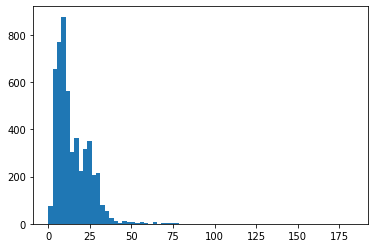

In [59]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=70)

In [64]:
max_len = 189
data = pad_sequences(X_data, maxlen = max_len)
data.shape

(5169, 189)

In [114]:
data[:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [0]:
X_test = data[n_of_test:]
y_test = np.array(y_data[n_of_test:])
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

In [0]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [109]:
X_test

array([[   0,    0,    0, ...,  220,  586,  162],
       [   0,    0,    0, ..., 1500, 2412, 2894],
       [   0,    0,    0, ...,  284,  191, 1501],
       ...,
       [   0,    0,    0, ...,   23,   99,  240],
       [   0,    0,    0, ...,  196,   12,   53],
       [   0,    0,    0, ...,    2,   63,  283]], dtype=int32)

In [97]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 6s 107ms/step - loss: 0.3357 - acc: 0.8800 - val_loss: 0.1856 - val_acc: 0.9407
Epoch 2/4
52/52 [==============================] - 5s 100ms/step - loss: 0.1296 - acc: 0.9695 - val_loss: 0.0881 - val_acc: 0.9794
Epoch 3/4
52/52 [==============================] - 5s 101ms/step - loss: 0.0662 - acc: 0.9846 - val_loss: 0.0598 - val_acc: 0.9855
Epoch 4/4
52/52 [==============================] - 5s 100ms/step - loss: 0.0406 - acc: 0.9906 - val_loss: 0.0465 - val_acc: 0.9855


In [103]:
model.evaluate(X_test, y_test)

130/130 [==============================] - 2s 18ms/step - loss: 0.0360 - acc: 0.9901


[0.035955145955085754, 0.9900846481323242]

In [122]:
pre

[482, 773, 482, 773, 482, 773]

In [107]:
X_test[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

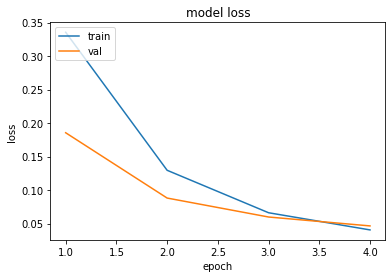

In [101]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [126]:
pre = [sum(tkz.texts_to_sequences("gogogo!!"), [])]
model.predict_classes(pad_sequences(pre, maxlen = max_len))

array([[0]], dtype=int32)